# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Exercise 02.1

The aim of this exercise is to compute a 1D integral via Monte Carlo using two different methods and compare the results.
The integral to compute is: $$I = \int_0^1 f(x) dx = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ 


#### Method 1: Sampling a uniform distribution in $[0,1]$

To calculate the first integral, I generated $M=10^5$ random numbers $x_i$, uniformly distributed between $0$ and $1$.
I then used the **blocking method** to average $f(x_i)$, according to the formula $$I=(b-a)\frac1N\sum_{i=1}^{N}f(x_i)$$ being $a=0$, $b=1$, $N=100$ (number of blocks).

#### Method 2: Using importance sampling

The idea of importance sampling is to introduce a **new probability distribution** $d(x)$ (with $d(x)\ge 0$ in $[a,b]$), which better approximates the function $f$, to use in the Monte Carlo calculation, in order to **lower the variance** of the results.
In this way the integral can be written as: 
$$I=\int_0^1 [\frac{f(x)}{d(x)}]d(x) dx$$ 
and one can calculate it sampling $x_i$ with the distribution given by $d(x)$ and applying the formula: $$I=(b-a)\frac1N\sum_{i=1}^{N}[\frac{f(x_i)}{d(x_i)}]$$

The distribution I decided to use is the linearisation of the function, i.e. $d(x)=2(1-x)$. I chose this one because it is the simplest probability distribution which approximates $f$, so it is easy to generate numbers according to this distribution, but it's enough to significantly lower the standard deviation.
To sample the $x_i$ according to $d(x)$ i used the method of the **inversion of the cumulative distribution**, generating the numbers $y_i$ unimformly distributed between 0 and one and calculating $x_i$ as $$x_i = 1-\sqrt y$$

The plot below shows the values of $I$ I got using the two methods, as a function of the number of blocks $N$.


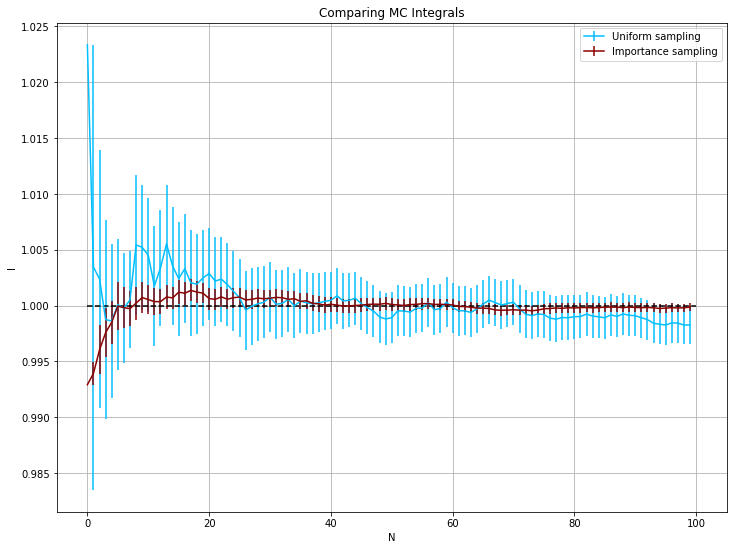

In [3]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

#Loading from file
Ux, Uy, Uerror = np.loadtxt ("Integral_Unif.dat", unpack = "true")
Ix, Iy, Ierror = np.loadtxt ("Integral_Imp.dat", unpack = "true")

figure = plt.figure (figsize=(12, 9))

#Plotting the graphs
plt.errorbar (Ux, Uy, yerr = Uerror, color = "deepskyblue", label="Uniform sampling")
plt.errorbar (Ix, Iy, yerr = Ierror, color = "darkred", label="Importance sampling")
plt.hlines (1, 0, 100, color = "black", linestyles="dashed")
plt.grid(True)
plt.title ("Comparing MC Integrals")
plt.xlabel ("N")
plt.ylabel ("I")
plt.legend()

plt.show()

As we can see, both the integrals converge to the expected value of $1$, but the second converges more quickly and with a significantly lower standard deviation (it is about one order of magnitude lower).

## Exercise 02.2

The aim of this exercise is to simulate two 3D random walks, the first making discrete steps on a cubic lattice and the second making discrete steps in the continuum, along a random direction.
In both cases the length of the step is $a=1$, and the number of steps is $n=100$.

#### Random walk on the lattice

To decide the direction, I generated **two random numbers**. The first one was to decide in the direction of what axis to make the step. I generated a random number uniformly sampled in $[0,3)$ and looked at its whole part: if it was 0, the step was made along the x axis, if it was 1, the step was made along the y axis, if it was 2 the step was made along the z axis. The second number was to decide whether to move forwards or backwards. I generated a random number uniformly sampled in $[0,1)$ and looked at its whole part: if it was 0, the step was made backwards, if it was 1, the step was made forwards.

#### Random walk in the continuum

In this case, to decide the direction i had to sample uniformly the **solid angle** $\Omega$. To do so, I sampled two random numbers: $\theta\in [0,\pi]$, indicating the azimuthal angle, and $\phi \in [0,2\pi]$, indicating the polar angle.
To make sure $\Omega$ was sampled uniformly, I used the following formulas to sample $\theta$ and $\phi$:
$$\theta = \arccos (1-2y), \ \ \ \ \ \ \phi = 2\pi y $$
being y a number sampled uniformly between $0$ and $1$.


For both simulations I made use of a **class "Position"** which could, given the step to make, take track of the position of the point. It could also calculate the distance of the point from the origin.

I made each simulation $M=10^4$ times, and then I plotted $\sqrt{\langle |\vec{r}_N|^2 \rangle}$, being $r$ the distance from the origin, with their statistical uncertainties, as function of the step $i\in [0,n]$. To calculate $\langle |\vec{r}_N|^2 \rangle$ I used the **blocking method** (with $N=100$). I calculated the uncertainty as $\frac{\sigma}{2\sqrt {\langle r\rangle}} $, being $\sigma$ the standard deviation of $\langle r^2 \rangle$.
Below the two plots are shown.

(DISCRETE) k_fit = [1.0131767] , uncertainty = [[3.27884314e-06]]
(CONTINUUM) k_fit = [1.01060659] , uncertainty = [[3.54676941e-06]]


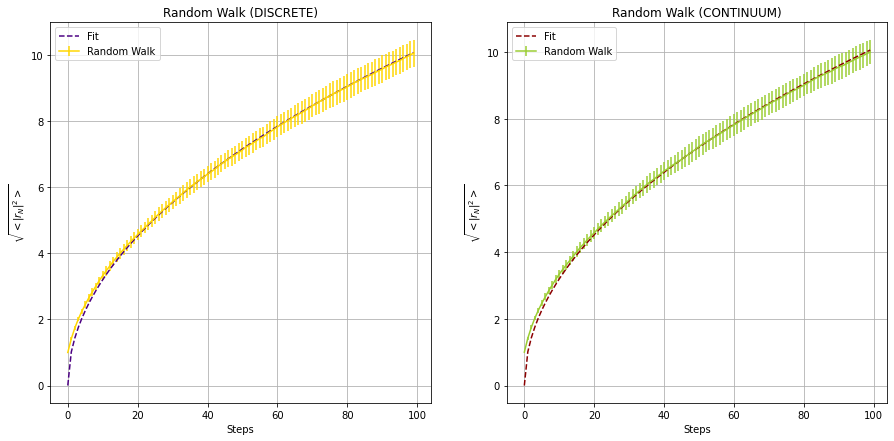

In [2]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Defining fitting function
def f(x,k): 
    return k*np.sqrt(x)

#Loading from file
Dx, Dy, Derror = np.loadtxt ("RW_Discr.dat", unpack = "true")
Cx, Cy, Cerror = np.loadtxt ("RW_Cont.dat", unpack = "true")

figure = plt.figure (figsize=(15, 7))

#Plotting discrete RW
plt.subplot(1, 2, 1)
plt.errorbar (Dx, Dy, yerr = Derror, color = "gold", label = "Random Walk")
plt.grid(True)
plt.title ("Random Walk (DISCRETE)")
plt.xlabel ("Steps")
plt.ylabel ("$\sqrt{< |r_N|^2 >}$")
Dp_opt, Dp_cov = curve_fit(f, Dx, Dy)
plt.plot (Dx, f(Dx, Dp_opt), color = "indigo", linestyle = "dashed", label = "Fit")
print ("(DISCRETE) k_fit =", Dp_opt, ", uncertainty =", Dp_cov)
plt.legend()

#Plotting continuous RW
plt.subplot(1, 2, 2)
plt.errorbar (Cx, Cy, yerr = Cerror, color = "yellowgreen", label = "Random Walk")
plt.grid(True)
plt.title ("Random Walk (CONTINUUM)")
plt.xlabel ("Steps")
plt.ylabel ("$\sqrt{< |r_N|^2 >}$")
Cp_opt, Cp_cov = curve_fit(f, Cx, Cy)
plt.plot (Cx, f(Cx, Cp_opt), color = "darkred", linestyle = "dashed", label = "Fit")
print ("(CONTINUUM) k_fit =", Cp_opt, ", uncertainty =", Cp_cov)
plt.legend()

plt.show()

The plots are well compatible with a diffusive behaviour. I fitted the plots with the function $y=k\sqrt N$ (when $k=a$ it describes a diffusive behaviour), and in both cases I got a value of $k$ very close (largely within its uncertainty) to $1$, the value chosen for $a$.